In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sns  # Imorting Seaborn library
import os

df=pd.read_csv('Group16_RegressionData (1).csv', index_col=0)
df.head()
df.tail()
y=df.Age
x = df.drop(["dataset"], axis=1) 
x= x.drop(["Age"], axis=1) 
x= x.drop(["Left-WM-hypointensities"], axis=1) 
x= x.drop(["Right-WM-hypointensities"], axis=1) 
x= x.drop(["Left-non-WM-hypointensities"], axis=1) 
x= x.drop(["Right-non-WM-hypointensities"], axis=1)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 1 to 4226
Columns: 134 entries, Left-Lateral-Ventricle to eTIV.1
dtypes: float64(122), int64(12)
memory usage: 4.4 MB


In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
pls2 = PLSRegression(n_components=2)
pls2.fit(x_train_scaled, y_train)

y_pred_test = pls2.predict(x_test_scaled)
y_pred_train = pls2.predict(x_train_scaled)

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

R2_train = r2_score(y_train, y_pred_train)
print("Training R2 for PLS Model: ", R2_train)

R2_test = r2_score(y_test, y_pred_test)
print("Testing R2 for PLS Model: ", R2_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)


Training R2 for PLS Model:  0.7618535182943437
Testing R2 for PLS Model:  0.7711254620341237
RMSE for Training Data:  9.763577458591739
RMSE for Testing Data:  9.688934272285035


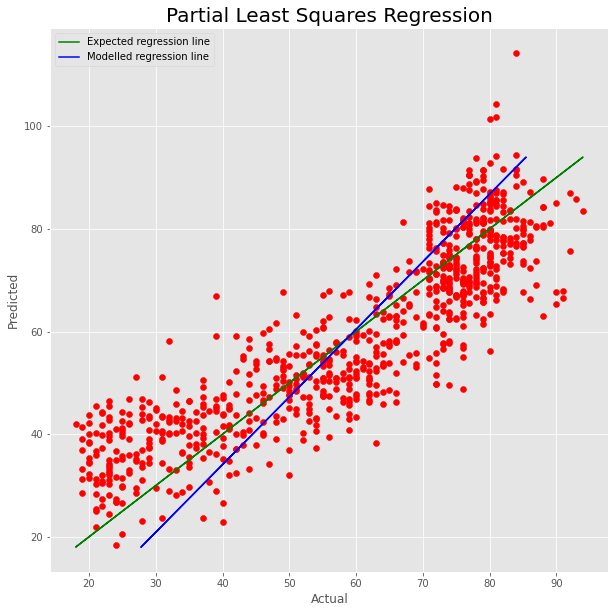

In [ ]:
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title("Partial Least Squares Regression", fontsize=20)
    plt.legend()
    plt.plot()